In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Data / Goal
The goal is to predicted customers which will buy a new car. The dataset has 400 observations. Independent variables = age, salary. Dependent variable = buy a car (1) or not buy a car (0).

In [2]:
dataset = pd.read_csv('data\Social_Network_Ads.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Exploratory Data Analysis
Correlation between age and salary is low, although very young people tend not to earn very high salaries. It also appears young people tend not to buy SUV's (probably because they are less likely to have offspring). There does not appear to be many outliers.

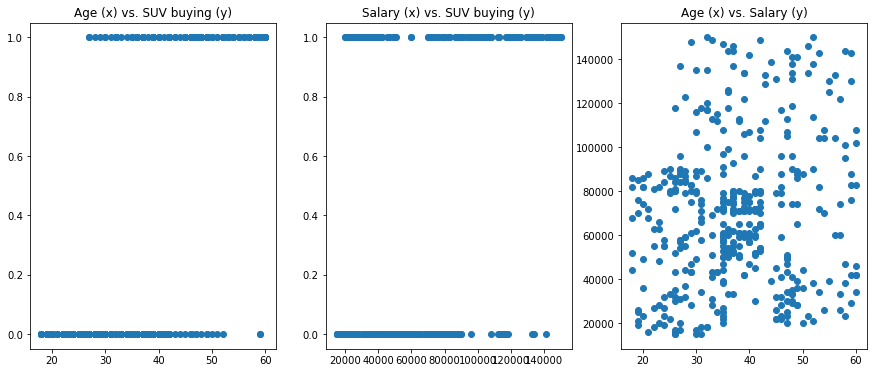

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,6))
ax1.scatter(X[:,0], y)
ax1.set_title("Age (x) vs. SUV buying (y)")
ax2.scatter(X[:,1], y)
ax2.set_title("Salary (x) vs. SUV buying (y)")
ax3.scatter(X[:,0],X[:,1])
ax3.set_title("Age (x) vs. Salary (y)")
plt.tight_layout
plt.show()

## LinearSVC
SVC finds the hyperplane (division in the feature space) that creates the biggest *margin* between the training points for the different classes. The margin effectively forms a band each side of the hyperplane. Incorrectly classified data points near the margin contribute to errors, which SVC tries to minimize. This forms a minimisation problem, where the SVC is trying to make the margin as large as possible, whilst minimizing the errors from misclassified points. The problem is a convex optimisation problem and is solved using the Lagrange function.

The accuracy achieved is 90%, with noticeably a lot of false positives. LinearSVC is as the name suggests... Linear, which means any non-linear relationships can't be represented. You can see the hyperplane (in this case a straight line) in the image below.

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)
pipeline = Pipeline([('sc', StandardScaler()), ('clf', LinearSVC())])
model = pipeline.fit(X_train, y_train)
predictions = model.predict(X_test)

cm = confusion_matrix(y_test,predictions)
print(cm)
accuracy_score(y_test,predictions)

[[66  2]
 [ 8 24]]


0.9

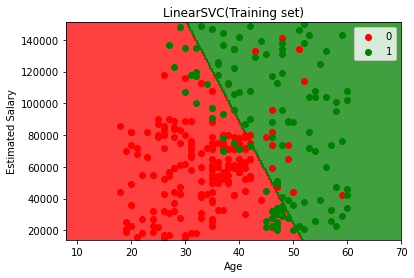

In [5]:
from matplotlib.colors import ListedColormap
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('LinearSVC(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## KernelSVC
If a dataset does not demonstrate a linear relationship, we can map this data to a higher dimension feature space, and then apply LinearSVC in that feature space. The idea is that after transforming our dataset to a higher dimension, the classes might not be linearly separable. It is easier to demonstrate this visually. As shown below data points which are inseparable in a lower dimension become separable in a higher dimension. This can be very computationally expensive (mapping data up and down dimensions). However, Kernels can provide a nice shortcut... they allows us to calculate the LinearSVC in a higher dimension without actually transforming the data.

As you can see the accuracy increases to 93%, and we have significantly less false positives. The hyperplane in the lower dimension is non-linear and does a much better job at describing the relationships in the data.

![image](images/kernel_images.png)

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)
pipeline = Pipeline([('sc', StandardScaler()), ('clf', SVC(kernel='rbf'))])
model2 = pipeline.fit(X_train, y_train)
predictions = model2.predict(X_test)

cm = confusion_matrix(y_test,predictions)
print(cm)
accuracy_score(y_test,predictions)

[[64  4]
 [ 3 29]]


0.93

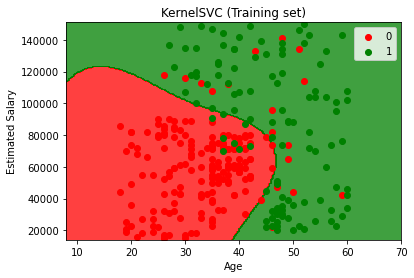

In [7]:
from matplotlib.colors import ListedColormap
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model2.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KernelSVC (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()